## Лабораторная работа № 1
## Бабичева Анна М8О-304Б-17
## Вариант № 2

Импортирую необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import math
import cmath

from sys import stdin
from copy import deepcopy

# Класс матрица
### Здесь описан класс матриц, с которым в дальнейшем я буду работать

In [2]:
class Matrix:
    
# ИНИЦИАЛИЗАЦИЯ
    def __init__(self, matrix, LU=False, history=False):
        self.matrix = deepcopy(matrix)
        self.size = self._Size()
        if LU == True:
            self.LU, self.P, self.p = self._LUP(history)
        else:
            self.LU = None
            self.P = None
            self.p = 0
        
# ПЕЧАТЬ МАТРИЦЫ
    def __str__(self):
        return '\n'.join([''.join(['%f\t' % i for i in row]) for
                          row in self.matrix])
# РАЗМЕР МАТРИЦЫ
    def _Size(self):
        rows = len(self.matrix)
        cols = 0
        for row in self.matrix:
            if (type(row) == int) | (type(row) == float):
                break
            if len(row) > cols:
                cols = len(row)
        return (rows, cols)
    
# LUP РАЗЛОЖЕНИЕ
    def _LUP(self, history=False):
        if self.size[0] != self.size[1]:
            raise Exception("Матрица должна быть квадратной")
    
        P = [i for i in range(self.size[0])]
        LU = self
        p = 0
 
        for k in range(self.size[0]):
            m = 0
            row, col = LU.Max_by_axis(k)
            if (row != k) & (LU.matrix[row][col] != 0):
                p += 1
            if LU.matrix[row][col] == 0:
                raise Exception("Столбец нулевой")
            P[k], P[row] = P[row], P[k]
            LU = Matrix.Permutation(row, col, self.size[0]).Multiply(LU)
            for i in range(k + 1, self.size[0]):
                LU.matrix[i][k] = LU.matrix[i][k] / LU.matrix[k][k]
                for j in range(k + 1, self.size[0]):
                    LU.matrix[i][j] = LU.matrix[i][j] - LU.matrix[i][k] * LU.matrix[k][j] 
            
        if history == True:
            print("P:\n{}".format(P))
        return LU, P, p

# LU
    def LU_(self, history=False):
        if self.size[0] != self.size[1]:
            raise Exception("Матрица должна быть квадратной")
            
        L = Matrix.E(self.size[0])
        U = Matrix.E(self.size[0])
        
        for i in range(self.size[0]):
            U.matrix[i][i] = self.LU.matrix[i][i]
            for j in range(self.size[0]):
                if (j < i):
                    L.matrix[i][j] = self.LU.matrix[i][j]
                else:
                    U.matrix[i][j] = self.LU.matrix[i][j]
        
        if history == True:
            print("L:\n{}".format(L))
            print("U:\n{}".format(U))
            print("LU:\n{}".format(L.Multiply(U)))
        return L, U

# УМНОЖЕНИЕ   
    def Multiply(self, m):
        if self.size[1] != m.size[0]:
            raise Exception("Несоответствие размерностей: {0} {1}".format(self.size, m.size))
        res = []
        rows = []
        for i in range(self.size[0]):
            for j in range(m.size[1]):
                val = 0
                for k in range(self.size[1]):
                    val += self.matrix[i][k] * m.matrix[k][j]                
                rows.append(val)    
            res.append(rows)
            rows = []
        return Matrix(res)
    
# СУММА   
    def Sum(self, m):
        if self.size != m.size:
            raise Exception("Несоответствие размерностей: {0} {1}".format(self.size, m.size))
        res = []
        rows = []
        for i, row in enumerate(self.matrix):
            for j, col in enumerate(row):
                rows.append(self.matrix[i][j] + m.matrix[i][j])    
            res.append(rows)
            rows = []
        return Matrix(res)
    
# УМНОЖЕНИЕ НА ЧИСЛО   
    def MultiNum(self, n):
        res = []
        rows = []
        for i, row in enumerate(self.matrix):
            for j, col in enumerate(row):
                rows.append(n * self.matrix[i][j])    
            res.append(rows)
            rows = []
        return Matrix(res)
    
# МАКСИМАЛЬНЫЙ ЭЕЛЕМЕНТ СРОКИ ИЛИ СТОЛБЦА ПО МОДУЛЮ  
    def Max_by_axis(self, num, axis=1):
        m = 0
        num = num
        if axis == 1:
            for i in range(num, self.size[0]):
                if abs(self.matrix[i][num]) > m:
                    m = self.matrix[i][num]
                    row = i
                    col = num
        elif axis == 0:
            for i in range(self.size[1]):
                if abs(self.matrix[num][i]) > m:
                    m = self.matrix[num][i]
                    row = num
                    col = i
        else:
            raise Exception("Недопустимое значение axis")
        return row, col
    
# МАКСИМАЛЬНЫЙ ЭЛЕМЕНТ МАТРИЦЫ    
    def Max(self):
        m = -10000000000
        for i in range(self.size[0]):
            for j in range(self.size[1]):
                if abs(self.matrix[i][j]) > m:
                    m = self.matrix[i][j]
        return m
    
# ОПРЕДЕЛИТЕЛЬ
    def Det(self):
        if self.size[0] != self.size[1]:
            raise Exception("Матрица должна быть квадратной")
        if self.LU == None:
            self.LU, self.P, self.p = self._LUP()
        det = pow(-1, self.p)
        for k in range(self.size[0]):
            det *= self.LU.matrix[k][k]
        return det
            
# ОБРАТНАЯ МАТРИЦА
    def Reverse(self):
        if self.size[0] != self.size[1]:
            raise Exception("Матрица должна быть квадратной")
        if self.LU == None:
            self.LU, self.P, self.p = self._LUP()
        det = self.Det()
        if det == 0:
            raise Exception("Определитель равен 0")
        res = []
        for k in range(self.size[0]):
            res.append(Gauss_LU(self, e(k, self.size[0])))
        return Matrix(res).Transpose()
    
# ТРАНСПОНИРОВАНИЕ
    def Transpose(self):
        res = self
        if self.size[0] == self.size[1]:
            for i in range(self.size[0]):
                for j in range(i + 1, self.size[0]):
                    a = res.matrix[i][j]
                    res.matrix[i][j] = res.matrix[j][i]
                    res.matrix[j][i] = a
            return res
        else:
            res = []            
            for i in range(self.size[1]):
                rows = []
                for j in range(self.size[0]):
                    rows.append(self.matrix[j][i])
                res.append(rows)
            return Matrix(res)
        
# РАВЕНСТВО МАТРИЦ
    def Equal(A, B):
        if (A.size[0] != B.size[0]) | (A.size[1] != B.size[1]):
            return False
        else:
            for i in range(A.size[0]):
                for j in range(A.size[1]):
                    if A.matrix[i][j] != B.matrix[i][j]:
                        return False
            return True
        
# СИММЕТРИЧНОСТЬ МАТРИЦЫ
    def Simmetric(m):
        if m.size[0] != m.size[1]:
            return False
        else:
            for i in range(m.size[0]):
                for j in range(i + 1, m.size[1]):
                    if m.matrix[i][j] != m.matrix[j][i]:
                        return False
            return True
    
##################  СТАТИЧЕСКИЕ  #######################

# ЕДИНИЧНАЯ МАТРИЦА
    def E(n):
        e = []
        rows = []
        for i in range(n):
            for j in range(n):
                if i == j:
                    rows.append(1)
                else:
                    rows.append(0)
            e.append(rows)
            rows = []
        return Matrix(e)

# НУЛЕВАЯ МАТРИЦА   
    def Zero(n):
        z = []
        rows = []
        for i in range(n):
            for j in range(n):
                rows.append(0)
            e.append(rows)
            rows = []
        return Matrix(z)
    
# МАТРИЦА ПЕРЕСТАНОВОК   
    def Permutation(row_col_1, row_col_2, n):
        if (row_col_1 > n) | (row_col_2 > n):
            raise Exception("Индексы за пределами массива")
        row_col_1 = row_col_1
        row_col_2 = row_col_2
        p = []
        rows = []
        for i in range(n):
            for j in range(n):
                if ((i == row_col_1) & (j == row_col_2)) | ((i == row_col_2) & (j == row_col_1)):
                    rows.append(1)
                elif (i == j) & ((i != row_col_1) & (j != row_col_2) & (i != row_col_2) & (j != row_col_1)):#(flag == True):
                    rows.append(1)                    
                else:
                    rows.append(0)
            p.append(rows)
            rows = []
        return Matrix(p)

# ВЕКТОР НАПРАВЛЕНИЯ
def e(i, n):
    e = []
    for j in range(n):
        if j == i:
            e.append(1)
        else:
            e.append(0)
    return e


# Часть 1

### 1.1.  Реализовать алгоритм LU -  разложения матриц (с выбором главного элемента) в виде программы. Используя разработанное программное обеспечение, решить систему линейных алгебраических уравнений (СЛАУ). Для матрицы СЛАУ вычислить определитель и обратную матрицу. 

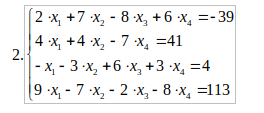

Исходная матрица может быть представлена в виде:

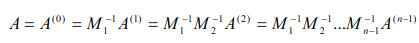

где:

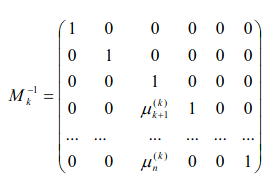

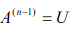

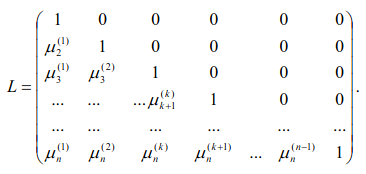

LU-разложение эффективно используется при решении систем уравнений вида: 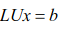

Тогда:

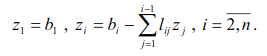

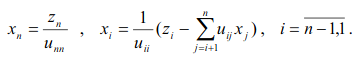

In [3]:
def Gauss_LU(A, b, history=False):
    if (A.size[0] != A.size[1]) | (A.size[0] != len(b)):
        raise Exception("Система имеет бесконечное число решений") 
    L, U = A.LU_(history)
    
    x = [0] * A.size[0]
    z = [0] * A.size[0]
    n = A.size[0] 
    
    for i in range(n):
        summ = 0
        for j in range(i):
            summ += L.matrix[i][j] * z[j]
 
        z[i] = b[A.P[i]] - summ
    
    for i in range(n - 1, -1, -1):
        summ = 0
        for j in range(i + 1, n):
            summ += U.matrix[i][j] * x[j]
 
        x[i] = (z[i] - summ) / U.matrix[i][i]
    return x

Решение системы

In [4]:
A = Matrix([[2, 7, -8, 6], [4, 4, 0, -7], [-1, -3, 6, 3], [9, -7, -2, -8]], LU=True, history=True)
b = [-39, 41, 4, 113]
print("Result: {}".format(Gauss_LU(A, b, history=True)))

P:
[3, 0, 1, 2]
L:
1.000000	0.000000	0.000000	0.000000	
0.222222	1.000000	0.000000	0.000000	
0.444444	0.831169	1.000000	0.000000	
-0.111111	-0.441558	0.340580	1.000000	
U:
9.000000	-7.000000	-2.000000	-8.000000	
0.000000	8.555556	-7.555556	7.777778	
0.000000	0.000000	7.168831	-9.909091	
0.000000	0.000000	0.000000	8.920290	
LU:
9.000000	-7.000000	-2.000000	-8.000000	
2.000000	7.000000	-8.000000	6.000000	
4.000000	4.000000	0.000000	-7.000000	
-1.000000	-3.000000	6.000000	3.000000	
Result: [8.0, -3.0000000000000004, 2.0, -2.9999999999999996]


Поиск определителя с помощью LU-разложения

In [5]:
A.Det()

-4924.000000000001

Поиск обратной матрицы с помощью LU-разложения

In [6]:
R = A.Reverse()
print(R)
print("\nA * R:\n{}".format(A.Multiply(R)))

0.102356	0.071893	0.161251	0.074330	
0.039805	0.111292	0.034931	-0.054427	
-0.003656	0.086718	0.154955	-0.020512	
0.081235	-0.038180	0.112104	0.011373	

A * R:
1.000000	-0.000000	0.000000	0.000000	
0.000000	1.000000	0.000000	0.000000	
0.000000	0.000000	1.000000	-0.000000	
-0.000000	0.000000	0.000000	1.000000	


# Часть 2
### 1.2. Реализовать метод прогонки в виде программы, задавая в качестве входных данных ненулевые элементы матрицы системы и вектор правых частей. Используя разработанное программное обеспечение, решить СЛАУ с трехдиагональной матрицей. 

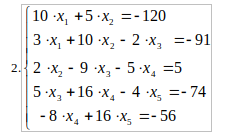

Для трехдиагональных матриц можно применить метод прогонки.

Прямой ход метода осуществляется по формулам:

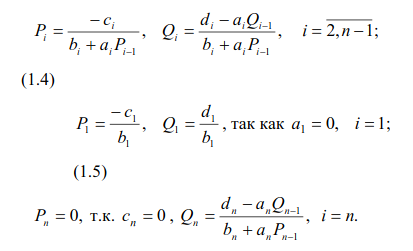

Обратный ход метода осуществляется по формулам:

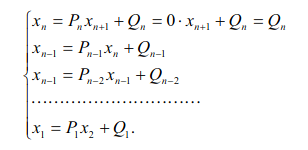

In [7]:
def Progonka(A, b):
    if (A.size[0] != A.size[1]) | (A.size[0] != b.size[0]):
        raise Exception("Система имеет бесконечное число решений")   
    X = [0] * A.size[0]
    P = [0] * A.size[0]
    Q = [0] * A.size[0]
    P[0] = -A.matrix[0][1] / A.matrix[0][0]
    Q[0] = b.matrix[0] / A.matrix[0][0]
    print("P = {}".format(P))
    print("Q = {}".format(Q))
    print("Begin")
    for i in range(1, A.size[0]):
        if i != A.size[0] - 1:
            P[i] = -A.matrix[i][i + 1] / (A.matrix[i][i] + P[i - 1] * A.matrix[i][i - 1])
        else:
            P[i] = 0
        Q[i] = (b.matrix[i] - Q[i - 1] * A.matrix[i][i - 1]) / (A.matrix[i][i] + P[i - 1] * A.matrix[i][i - 1])
        print("Step {}:".format(i))
        print("P = {}".format(P))
        print("Q = {}".format(Q))
        print("-------------------------------------------")
    for i in range(A.size[0] - 1, -1, -1):
        if i != A.size[0] - 1:
            X[i] = X[i + 1] * P[i] + Q[i]
        else:
            X[i] = Q[i]
    print("Result: {}".format(X))
        

Решение системы

In [8]:
A = Matrix([[10, 5, 0, 0, 0], [3, 10, -2, 0, 0], [0, 2, -9, -5, 0], [0, 0, 5, 16, -4], [0, 0, 0, -8, 16]])
b = Matrix([-120, -91, 5, -74, -56])
Progonka(A, b)

P = [-0.5, 0, 0, 0, 0]
Q = [-12.0, 0, 0, 0, 0]
Begin
Step 1:
P = [-0.5, 0.23529411764705882, 0, 0, 0]
Q = [-12.0, -6.470588235294118, 0, 0, 0]
-------------------------------------------
Step 2:
P = [-0.5, 0.23529411764705882, -0.5862068965517242, 0, 0]
Q = [-12.0, -6.470588235294118, -2.103448275862069, 0, 0]
-------------------------------------------
Step 3:
P = [-0.5, 0.23529411764705882, -0.5862068965517242, 0.30606860158311344, 0]
Q = [-12.0, -6.470588235294118, -2.103448275862069, -4.857519788918205, 0]
-------------------------------------------
Step 4:
P = [-0.5, 0.23529411764705882, -0.5862068965517242, 0.30606860158311344, 0]
Q = [-12.0, -6.470588235294118, -2.103448275862069, -4.857519788918205, -6.999999999999999]
-------------------------------------------
Result: [-9.0, -6.0, 1.9999999999999996, -6.999999999999999, -6.999999999999999]


# Часть 3
### 1.3. Реализовать метод простых итераций и метод Зейделя в виде программ, задавая в качестве входных данных матрицу системы, вектор правых частей и точность вычислений. Используя разработанное программное обеспечение, решить СЛАУ. Проанализировать количество итераций, необходимое для достижения заданной точности.

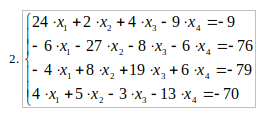

Исходную СЛАУ можно привести к эквивалентному виду с помощью простейших преобразований. В общем случае эквивалентный вид выглядит:

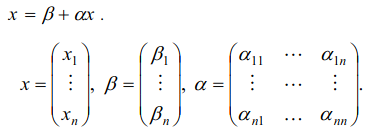

Эту систему можно разрешить относительно неизвестных при ненулевых диагональных элементах исходной матрицы. Тогда:

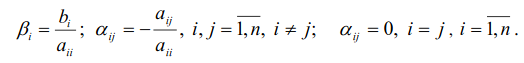

Нахождение неизвестных

In [9]:
def alpha_beta(A, b):
    beta = []
    alpha = []
    rows_a = []
    rows_b = []
    for i in range(A.size[0]):
        rows_b.append(b.matrix[i] / A.matrix[i][i])
        beta.append(rows_b)
        rows_b = []
        for j in range(A.size[0]):
            if i == j:
                rows_a.append(0)
            else:
                rows_a.append(-(A.matrix[i][j] / A.matrix[i][i]))
        alpha.append(rows_a)
        rows_a = []
    return Matrix(alpha), Matrix(beta)

В качестве первого приближения возьмем 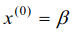

Тогда метод простых итераций имеет вид:

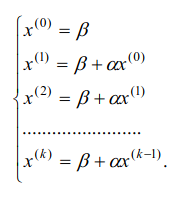

При 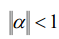

критерий остановы имеет вид:

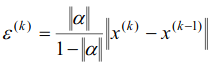

иначе: 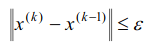

In [10]:
def norm(x):
    return x.Max()

## Метод простых итераций

In [11]:
def Simple_iterations(A, b, eps=0.01):
    if (A.size[0] != A.size[1]) | (A.size[0] != b.size[0]):
        raise Exception("Система имеет бесконечное число решений") 
    alpha, beta = alpha_beta(A, b)
    x = beta.Sum(alpha.Multiply(beta))
    flag = True
    if norm(alpha) < 1:
        e = (norm(alpha) * norm(beta)) / (1 - norm(alpha))
    else:
        e = norm(x.Sum(beta.MultiNum(-1)))
        flag = False
    k = 1
    print("Begin SIMPLE ITERATIONS method")
    print("****************************************")
    print("Iteration {}".format(k))
    print("x{0} = {1}".format(k, x))
    print("eps{0} = {1}".format(k, e))
    print("----------------------------------------")
    x_new = []
    while e > eps:
        x_new = beta.Sum(alpha.Multiply(x))
        if flag == True:
            e = (norm(alpha) * norm(x_new.Sum(x.MultiNum(-1)))) / (1 - norm(alpha))
        else:
            e = norm(x_new.Sum(x.MultiNum(-1)))
        k = k + 1
        print("Iteration {}".format(k))
        print("x{} = ".format(k))
        print(x_new)
        print("eps{0} = {1}".format(k, e))
        x = x_new
        print("----------------------------------------")
    print("****************************************")
    print("Result: \n{}".format(x_new))
    print("Iterations: {}".format(k))

Для ускорения сходимости метода простых итераций существует метод Зейделя, заключающийся в использовании на текущей итерации результат уже вычисленных на этой итерации значений. Метод Зейделя имеет вид:

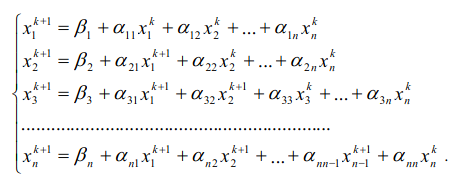

Данную систему можно представить в векторно-матричном виде:

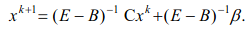

где B - нижняя стреугольная матрица с диагональными элементами, равными нулю, а C - верхняя треугольная с диагональными элементами, отличными от нуля. 

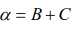

Построение матриц

In [12]:
def alpha_beta_(A, b):
    beta = []
    B = []
    C = []
    rows_B = []
    rows_C = []
    rows_b = []
    for i in range(A.size[0]):
        rows_b.append(b.matrix[i] / A.matrix[i][i])
        beta.append(rows_b)
        rows_b = []
        for j in range(A.size[0]):
            if i == j:
                rows_B.append(0)
                rows_C.append(0)
            elif i > j:
                rows_B.append(-(A.matrix[i][j] / A.matrix[i][i]))
                rows_C.append(0)
            else:
                rows_C.append(-(A.matrix[i][j] / A.matrix[i][i]))
                rows_B.append(0)
        B.append(rows_B)
        C.append(rows_C)
        rows_B = []
        rows_C = []
    return Matrix(B), Matrix(C), Matrix(beta)

При 

критерий остановы имеет вид:

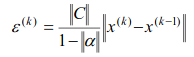

иначе

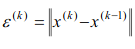

## Метод Зейделя

In [13]:
def Zeidel(A, b, eps=0.01):
    if (A.size[0] != A.size[1]) | (A.size[0] != b.size[0]):
        raise Exception("Система имеет бесконечное число решений") 
    B, C, beta = alpha_beta_(A, b)
    alpha = B.Sum(C)
    x = beta
    flag = True
    if norm(alpha) < 1:
        e = (norm(C) * norm(x)) / (1 - norm(alpha))
    else:
        e = norm(x)
        flag = False
    k = 1
    print("Begin ZEIDEL method")
    print("****************************************")
    print("Iteration {}".format(k))
    print("x{0} = {1}".format(k, x))
    print("eps{0} = {1}".format(k, e))
    print("----------------------------------------")
    x_new = []
    while e > eps:
        x_new = (((((Matrix.E(A.size[0])).Sum(B.MultiNum(-1))).Reverse()).Multiply(C)).Multiply(x)).Sum((((Matrix.E(A.size[0])).Sum(B.MultiNum(-1))).Reverse()).Multiply(beta))
        if flag == True:
            e = (norm(C) * norm(x_new.Sum(x.MultiNum(-1)))) / (1 - norm(alpha))
        else:
            e = norm(x_new.Sum(x.MultiNum(-1)))
        k = k + 1
        print("Iteration {}".format(k))
        print("x{} = ".format(k))
        print(x_new)
        print("eps{0} = {1}".format(k, e))
        x = x_new
        print("----------------------------------------")
    print("****************************************")
    print("Result: \n{}".format(x_new))
    print("Iterations: {}".format(k))

Записываю систему

In [14]:
A = Matrix([[24, 2, 4, -9], [-6, -27, -8, -6], [-4, 8, 19, 6], [4, 5, -3, -13]])
b = Matrix([-9, -76, -79, -70])

Решаю методом простых итераций

In [15]:
Simple_iterations(A, b)

Begin SIMPLE ITERATIONS method
****************************************
Iteration 1
x1 = 2.102645	
2.933536	
-7.122432	
7.311366	
eps1 = 3.365384615384616
----------------------------------------
Iteration 2
x2 = 
3.309373	
2.833163	
-7.259258	
8.803504	
eps2 = 0.9325864553175621
----------------------------------------
Iteration 3
x3 = 
3.900094	
2.273956	
-7.434149	
9.167775	
eps3 = 0.36920037871683686
----------------------------------------
Iteration 4
x4 = 
4.112444	
2.113555	
-7.189364	
9.174815	
eps4 = 0.15299056084098595
----------------------------------------
Iteration 5
x5 = 
4.087654	
1.992272	
-7.079345	
9.121973	
eps5 = 0.06876210712114084
----------------------------------------
Iteration 6
x6 = 
4.059608	
1.976926	
-7.016811	
9.042309	
eps6 = -0.04979004186693281
----------------------------------------
****************************************
Result: 
4.059608	
1.976926	
-7.016811	
9.042309	
Iterations: 6


Решаю методом Зейделя

In [16]:
Zeidel(A, b)

Begin ZEIDEL method
****************************************
Iteration 1
x1 = -0.375000	
2.814815	
-4.157895	
5.384615	
eps1 = 3.2812499999999996
----------------------------------------
Iteration 2
x2 = 
2.102645	
2.382948	
-6.418984	
8.429406	
eps2 = 1.8554190278194298
----------------------------------------
Iteration 3
x3 = 
3.657279	
2.030806	
-6.904935	
8.884458	
eps3 = 0.9473547458259403
----------------------------------------
Iteration 4
x4 = 
3.938260	
2.011229	
-6.981239	
8.980992	
eps4 = 0.17122315555827672
----------------------------------------
Iteration 5
x5 = 
3.988810	
2.001152	
-6.996838	
8.996270	
eps5 = 0.03080340135633869
----------------------------------------
Iteration 6
x6 = 
3.997978	
2.000341	
-6.999391	
8.999369	
eps6 = 0.00558729314881283
----------------------------------------
****************************************
Result: 
3.997978	
2.000341	
-6.999391	
8.999369	
Iterations: 6


# Часть 4
### 1.4. Реализовать метод вращений в виде программы, задавая в качестве входных данных матрицу и точность вычислений. Используя разработанное программное обеспечение, найти собственные значения и собственные векторы симметрических матриц. Проанализировать зависимость погрешности вычислений от числа итераций. 

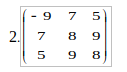

Метод вращений применим только для симметричных матриц и решает полную проблему собственных векторов и собственных значений для таких матриц.

Он основан на отыскании матрицы U:

где 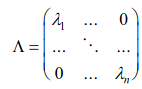

Алгоритм:

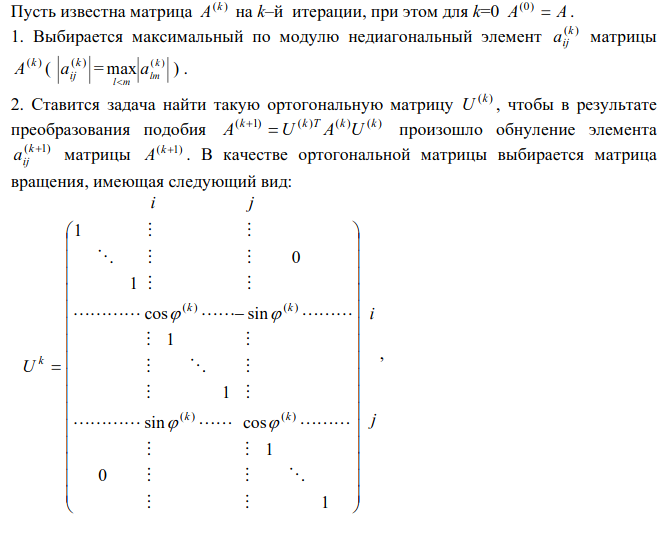

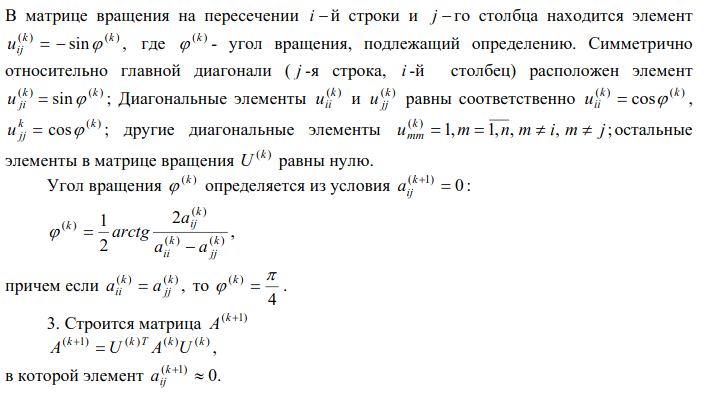

Критерий окончания: 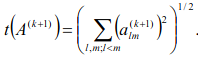

In [17]:
def t(A):
    a = 0
    for l in range(A.size[0]):
        for m in range(l + 1, A.size[0]):
            a += A.matrix[l][m] * A.matrix[l][m]
    a = math.sqrt(a)
    return a

Координатными столбцами матрицы будут: 

Собственными значениями будут: 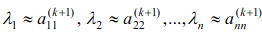

In [18]:
def max_ij(A):
    m = 0
    row, col = 0, 0
    for i in range(A.size[0]):
        for j in range(A.size[0]):
            if i == j:
                continue
            if (math.fabs(A.matrix[i][j]) > m) & (math.fabs(A.matrix[i][j]) != 0):
                m = A.matrix[i][j]
                row = i
                col = j
    if (row == 0) & (col == 0):
        raise Exception("Матрица вырожденная")
    return m, row, col

def Rotation(A, eps=0.01):
    if Matrix.Simmetric(A) == False:
        raise Exception("Матрица несимметричная")
    Ak = A
    k = 0
    e = t(A)
    V = Matrix.E(A.size[0])
    U = []
    rows_U = []
    print("Begin ROTATION method")
    print("****************************************")
    print("Iteration {}".format(k))
    print("A{0} = \n {1}".format(k, A))
    print("eps{0} = {1}".format(k, e))
    print("----------------------------------------")
    while e > eps:
        U = []
        k += 1
        m, i, j = max_ij(Ak)
        if Ak.matrix[i][i] != Ak.matrix[j][j]:
            phi = math.atan((2 * m) / (Ak.matrix[i][i] - Ak.matrix[j][j])) / 2
        else:
            phi = math.pi / 4
        for r in range(Ak.size[0]):
            for c in range(Ak.size[0]):
                if (r == i) & (c == j):
                    rows_U.append(-math.sin(phi))
                elif (r == j) & (c == i):
                    rows_U.append(math.sin(phi))
                elif ((r == i) & (c == i)) | ((c == j) & (r == j)):
                    rows_U.append(math.cos(phi))
                elif r == c:
                    rows_U.append(1)
                else:
                    rows_U.append(0) 
            U.append(rows_U)
            rows_U = []
        Ak = ((Matrix(U).Transpose()).Multiply(Ak)).Multiply(Matrix(U))
        e = t(Ak)
        V = V.Multiply(Matrix(U))
        print("Iteration {}".format(k))
        print("U{} = ".format(k))
        print(Matrix(U))
        print("A{} = ".format(k))
        print(Ak)
        print("eps{0} = {1}".format(k, e))
        print("----------------------------------------")      
    print("****************************************")
    res = []
    for l in range(Ak.size[0]):
        res.append(Ak.matrix[l][l])
    print("Result: {}".format(res))
    print("Eigen vectors: \n{}".format(V))
    print("Iterations: {}".format(k))

Ищу собственный векторы и собственные значения

In [19]:
m = Matrix([[-9, 7, 5], [7, 8, 9], [5, 9, 8]])
Rotation(m)

Begin ROTATION method
****************************************
Iteration 0
A0 = 
 -9.000000	7.000000	5.000000	
7.000000	8.000000	9.000000	
5.000000	9.000000	8.000000	
eps0 = 12.449899597988733
----------------------------------------
Iteration 1
U1 = 
1.000000	0.000000	0.000000	
0.000000	0.707107	-0.707107	
0.000000	0.707107	0.707107	
A1 = 
-9.000000	8.485281	-1.414214	
8.485281	17.000000	0.000000	
-1.414214	0.000000	-1.000000	
eps1 = 8.602325267042627
----------------------------------------
Iteration 2
U2 = 
0.958489	0.285128	0.000000	
-0.285128	0.958489	0.000000	
0.000000	0.000000	1.000000	
A2 = 
-11.524175	-0.000000	-1.355509	
0.000000	19.524175	-0.403232	
-1.355509	-0.403232	-1.000000	
eps2 = 1.414213562373094
----------------------------------------
Iteration 3
U3 = 
1.000000	0.000000	0.000000	
0.000000	0.999807	0.019635	
0.000000	-0.019635	0.999807	
A3 = 
-11.524175	0.026616	-1.355247	
0.026616	19.532094	0.000000	
-1.355247	0.000000	-1.007919	
eps3 = 1.355508618313096
----------

# Часть 5 
### 1.5. Реализовать алгоритм QR – разложения матриц в виде программы. На его основе разработать программу, реализующую QR – алгоритм решения полной проблемы собственных значений произвольных матриц, задавая в качестве входных данных матрицу и точность вычислений. С использованием разработанного программного обеспечения найти собственные значения матрицы.

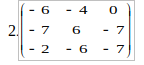

Данный метод используется для решения полной проблемы собственных значений для несимметричных матриц. Метод позволяет найти как вещественные, так и комплексные собственные значения.

QR-алгоритм основан по многократном построении QR-разложения матрицы.

Исходную матрицу можно представить в виде:

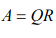

где Q - ортогональная матрица, а R - верхняя треугольная.

Для построения данного разложения используется преобразование Хаусхолдера:

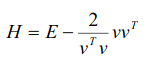

In [20]:
def H(v):
    v1 = []    
    for i in range(len(v)):
        rows = []
        for j in range(len(v)):
            rows.append(v[i] * v[j])
        v1.append(rows)
    v2 = 0
    for i in range(len(v)):
        v2 += v[i] * v[i]
    return Matrix.E(len(v)).Sum(Matrix(v1).MultiNum(-2 / v2))

Данное преобразование позволит обнулять поддиагональные элементы матрицы: 

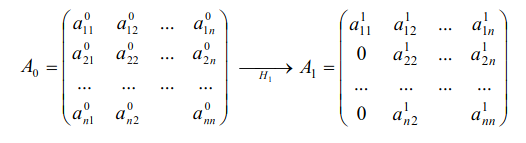

Компоненты вектора вычисляются так:

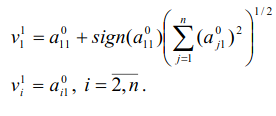

На следующем шаге строится новая матрица, обнуляющая следующие поддиагональные элементы:

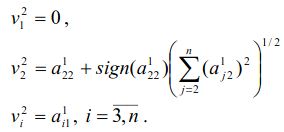

Повторяя процесс n-1 раз, получим искомое разложение, где:

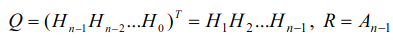

In [21]:
def sign(x):
    if x < 0:
        return -1
    elif x > 0:
        return 1
    else:
        return 0

def QR(A, history=False):
    if A.size[0] != A.size[1]:
        raise Exception("Матрица должна быть квадратной")
    if history == True:
        print("QR algorithm")
    Ak = A
    Q = Matrix.E(A.size[0])
    for k in range(A.size[0]):
        v = []
        for l in range(A.size[0]):
            if l < k:
                v.append(0)
            elif l == k:
                a = 0
                for j in range(A.size[0]):
                    a += Ak.matrix[j][k] * Ak.matrix[j][k]
                v.append(Ak.matrix[l][k] + sign(Ak.matrix[l][k]) * math.sqrt(a))
            else:
                v.append(A.matrix[l][k])
        Ak = H(v).Multiply(Ak)
        Q = Q.Multiply(H(v))
    if history == True:
        print("Q = \n {}".format(Q))
        print("R = \n {}".format(Ak))
        print("A = QR = \n {}".format(Q.Multiply(Ak)))
    return Q, Ak

Итерационный процесс для QR-алгоритма выглядит так: 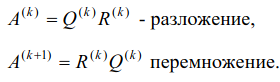

В случае отсутствия комплексных собственных значений алгоритм сводит исходную матрицу к треугольной матрице, иначе к квазитреугольной, где каждой комплексно-сопряженной паре соотвествует блок 2 * 2. Для вещественных значений критерий сходимости 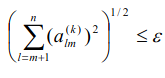

In [22]:
# ДЛЯ ВЕЩЕСТВЕННЫХ
def eps_2(A, k):
    e = 0
    for l in range(k + 1, A.size[0]):
        e += A.matrix[l][k] * A.matrix[l][k]
    e = math.sqrt(e)
    return e

Для комплексной пары 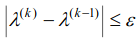

In [23]:
# ДЛЯ КОМПЛЕКСНЫХ
def eps_1(A, k):
    e = 0
    for l in range(k + 2, A.size[0]):
        e += A.matrix[l][k] * A.matrix[l][k]
    e = math.sqrt(e)
    return e

def eps_l(l):
    return abs(l)

значения которых находятся из 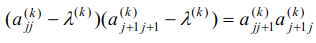

In [24]:
def solve_lambda(A, k):
    b = A.matrix[k][k] + A.matrix[k + 1][k + 1]
    c = A.matrix[k][k] * A.matrix[k + 1][k + 1] - A.matrix[k][k + 1] * A.matrix[k + 1][k]
    d = b * b - 4 * c
    
    return complex((complex(-b) + cmath.sqrt(d)) / complex(2)), complex((complex(-b) - cmath.sqrt(d)) / complex(2))

In [25]:
def QR_values(A, eps=0.01):
    if A.size[0] != A.size[1]:
        raise Exception("Матрица должна быть квадратной")
    it = 0
    Q, R = QR(A)
    res = []
    cmplx = False
    print("Begin QR method")
    print("****************************************")
    for k in range(A.size[0]):
        if cmplx == True:
            cmplx = False
            continue
        it += 1
        cmplx = False
        Ak = R.Multiply(Q)
        e_1 = eps_1(Ak, k)
        e_2 = eps_2(Ak, k)
        count = 0
        
        print("Iteration {}".format(it))
        print("A{0} = \n {1}".format(it, Ak))
        print("complex eps{0} = {1}".format(it, e_1))
        print("real eps{0} = {1}".format(it, e_2))
        print("----------------------------------------")
        while e_1 > eps:
            it += 1
            Q, R = QR(Ak)
            Ak = R.Multiply(Q)
            e_1 = eps_1(Ak, k)            
        
            l_1, l_2 = solve_lambda(Ak, k)            
        while e_2 > eps:
            count += 1           
            it += 1
            
            Q, R = QR(Ak)
            Ak = R.Multiply(Q)
            e_2 = eps_2(Ak, k)
            
            lk_1, lk_2 = solve_lambda(Ak, k)
            
            e_l_1 = eps_l(l_1 - lk_1)
            e_l_2 = eps_l(l_2 - lk_2)
            
            l_1 = lk_1
            l_2 = lk_2
            if count > 100:
                cmplx = True
                while (e_l_1 > eps) & (e_l_2 > eps):
                    it += 1
                    lk_1, lk_2 = solve_lambda(Ak, k)
                    
                    e_l_1 = eps_l(l_1 - lk_1)
                    e_l_2 = eps_l(l_2 - lk_2)
                    
                    l_1 = lk_1
                    l_2 = lk_2
                break
                
        print("Iteration {}".format(it))
        print("A{} = ".format(it))
        print(Ak)
        print("complex eps{0} = {1}".format(it, e_1))
        print("real eps{0} = {1}".format(it, e_2))
        
        if cmplx == True:
            print("lambda 1 eps = {}".format(e_l_1))
            print("lambda 2 eps = {}".format(e_l_2))
            print("lambdas: {0}, {1}".format(l_1, l_2))
            res.append(l_1)
            res.append(l_2)
        else:
            res.append(Ak.matrix[k][k])
            
        print("----------------------------------------")  
    print("****************************************")    
    print("Result: {}".format(res))
    print("Iterations: {}".format(it))

Задаю матрицу

In [26]:
A = Matrix([[-6, -4, 0], [-7, 6, -7], [-2, -6, -7]])

QR-разложение матрицы

In [27]:
QR(A, history=True)

QR algorithm
Q = 
 -0.635999	0.442357	0.632318	
-0.741999	-0.575652	-0.343603	
-0.212000	0.687710	-0.694342	
R = 
 9.433981	-0.635999	6.677987	
-0.000000	-9.349600	-0.784408	
-0.000000	-0.424838	7.265618	
A = QR = 
 -6.000000	-4.000000	-0.000000	
-7.000000	6.000000	-7.000000	
-2.000000	-6.000000	-7.000000	


(<__main__.Matrix at 0x7f6a19bf4da0>, <__main__.Matrix at 0x7f6a19bf4908>)

QR-алгоритм

In [28]:
QR_values(A)

Begin QR method
****************************************
Iteration 1
A1 = 
 -6.943820	9.131821	1.546998	
7.103683	4.842669	3.757200	
-1.225079	5.241197	-4.898849	
complex eps1 = 1.2250790160020435
real eps1 = 7.208546037009186
----------------------------------------
Iteration 55
A55 = 
-11.338375	2.380236	2.660830	
0.009764	10.010872	1.140545	
-0.000000	0.000000	-5.672497	
complex eps55 = 0.005941586882213649
real eps55 = 0.009763760840164656
----------------------------------------
Iteration 56
A56 = 
 -11.338375	2.380236	2.660830	
0.009764	10.010872	1.140545	
-0.000000	0.000000	-5.672497	
complex eps56 = 0.0
real eps56 = 4.8980490721211656e-14
----------------------------------------
Iteration 56
A56 = 
-11.338375	2.380236	2.660830	
0.009764	10.010872	1.140545	
-0.000000	0.000000	-5.672497	
complex eps56 = 0.0
real eps56 = 4.8980490721211656e-14
----------------------------------------
Iteration 57
A57 = 
 -11.338375	2.380236	2.660830	
0.009764	10.010872	1.140545	
-0.000000	0.000000

Для проверки работы алгоритма в случае комплексных собственных значений использую матрицу 4 * 4:

In [29]:
A = Matrix([[-6, -4, 0, 100], [-7, 6, -7, -2], [-2, 50, -6, -7], [11, 39, 46, -2]])
QR_values(A)

Begin QR method
****************************************
Iteration 1
A1 = 
 -52.880952	-21.864240	-20.070152	-14.296730	
16.954669	37.339384	3.981971	-47.835994	
68.511824	-51.205714	21.538855	8.418903	
-20.616168	4.669306	-13.419216	-13.997287	
complex eps1 = 71.54646350652385
real eps1 = 73.5279352099311
----------------------------------------
Iteration 129
A129 = 
-4.319372	57.861549	72.544064	13.312114	
-29.927163	53.239912	-27.316130	23.916873	
-0.000000	0.000000	-32.326418	-32.080929	
0.000000	-0.000000	2.676812	-24.594122	
complex eps129 = 0.00840647819093611
real eps129 = 29.927163324602297
lambda 1 eps = 9.243885181758805e-14
lambda 2 eps = 9.243885181758805e-14
lambdas: (-24.460269825248776+30.056018282515588j), (-24.460269825248776-30.056018282515588j)
----------------------------------------
Iteration 130
A130 = 
 -4.319372	57.861549	72.544064	13.312114	
-29.927163	53.239912	-27.316130	23.916873	
-0.000000	0.000000	-32.326418	-32.080929	
0.000000	-0.000000	2.676812	-24.594